# 1. Data Source and Provenance

This study utilizes an openly available dataset of audio features derived from Spotify tracks. The dataset, titled **Spotify Song Attributes**, is published on Kaggle and contains a large collection of numeric descriptors that characterize various acoustic and stylistic aspects of music. These descriptors are not manually labeled; instead, they are computed automatically by Spotify’s internal machine learning and digital signal processing systems.

The dataset consists of objective, algorithmically generated values that quantify properties such as energy, danceability, instrumentalness, and acousticness. Each observation corresponds to a single track represented by its computed attributes. No user-specific or personally identifiable data is included; the dataset strictly contains audio-derived measurements.

## Dataset Link
Kaggle Title: *Spotify Song Attributes Dataset*  
URL: https://www.kaggle.com/datasets/byomokeshsenapati/spotify-song-attributes

## Method of Data Collection

The data was collected through the **Spotify Web API**, which permits authorized access to Spotify’s audio feature extraction models. The dataset creator queried the API using track identifiers and compiled the resulting feature vectors into a structured dataset. Each feature is produced by Spotify’s automated analytics pipeline, ensuring consistency across tracks and enabling large-scale analysis without manual labeling.

## Characteristics of the Data

All features in this dataset are numerical and represent continuous or scaled quantitative measures of sound characteristics. Each row corresponds to one distinct track, and each column denotes a numeric attribute reflecting an identifiable audio property. Because the dataset lacks human-provided labels (such as mood or genre), it is inherently appropriate for **unsupervised learning tasks**, particularly clustering and dimensionality reduction. These approaches enable the discovery of latent musical groupings and patterns without predefined categories.


# 2. Identification of the Unsupervised Learning Problem

The objective of this project is to investigate the underlying structure of Spotify audio feature data and to identify latent relationships among songs based solely on their quantified acoustic properties. Since the dataset does not include human-labeled targets such as genre, mood, or style categories, supervised learning approaches are not applicable. Instead, unsupervised learning methods are appropriate for discovering natural groupings or clusters embedded in the data.

### Problem Definition

Digital music platforms store extensive numerical information about audio characteristics, yet these values are rarely used directly to categorize or recommend new music. This raises a fundamental question:

**Can songs be grouped into meaningful categories based solely on machine-generated audio features, without any prior labeling?**

By answering this question, the project aims to reveal latent clusters that may correspond to intuitive music categories such as energetic songs, calm acoustic tracks, or highly danceable electronic music. Such groupings could serve as a basis for recommendation systems, playlist generation, or music library organization without reliance on existing metadata or genre labels.

### Selected Methodology

This study employs two complementary unsupervised learning techniques:

1. **Principal Component Analysis (PCA)** will be used for dimensionality reduction and visualization. PCA will reduce the high-dimensional feature space to a small number of principal components that capture the majority of explained variance. This step facilitates both interpretability and efficient clustering.

2. **K-Means Clustering** will be applied to the reduced feature space to partition songs into distinct groups. The number of clusters will be determined empirically through model evaluation criteria such as the elbow method and silhouette score. This allows selection of an appropriate value for \( k \) based on quantitative measures rather than subjective guesswork.

### Expected Outcomes

The expected result of this analysis is a set of identifiable song clusters that represent distinct acoustic or stylistic profiles derived entirely from numeric attributes. Interpretation of these clusters will be performed by analyzing the centroid values and comparing feature distributions across groups. The findings will offer insight into whether computationally derived features are sufficient for distinguishing meaningful categories of music in the absence of explicit genre labels.


# 3. Exploratory Data Analysis (EDA)

This section examines the statistical properties, distributions, and potential data quality issues within the Spotify dataset. The objective of the EDA stage is to evaluate the suitability of the available attributes for unsupervised music clustering and to justify the preprocessing decisions that will support model development in subsequent sections.

The clustering process will focus exclusively on intrinsic audio characteristics rather than metadata such as track names, artists, or textual labels. The selected features are those computed directly by Spotify’s internal audio analysis models and provide numerical descriptions of musical properties:

- danceability
- energy
- loudness
- speechiness
- acousticness
- instrumentalness
- liveness
- valence
- tempo

These attributes represent the core quantitative information available about a track’s structure, instrumentation, and stylistic profile. Limiting the analysis to these features avoids contamination from categorical or user-generated metadata and ensures that the resulting clusters reflect genuine acoustic relationships.

In [3]:
import pandas as pd

df = pd.read_csv('Spotify_Song_Attributes.csv')
df.head()

,trackName,artistName,msPlayed,genre,danceability,energy,key,loudness,mode,speechiness,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,"""Honest""",Nico Collins,191772,NaN,0.476,0.799,4.0,-4.939,0.0,0.2120,...,0.2570,0.577,162.139,audio_features,7dTxqsaFGHOXwtzHINjfHv,spotify:track:7dTxqsaFGHOXwtzHINjfHv,https://api.spotify.com/v1/tracks/7dTxqsaFGHOX...,https://api.spotify.com/v1/audio-analysis/7dTx...,191948.0,4.0
1,"""In The Hall Of The Mountain King"" from Peer G...",London Symphony Orchestra,1806234,british orchestra,0.475,0.130,7.0,-17.719,1.0,0.0510,...,0.1010,0.122,112.241,audio_features,14Qcrx6Dfjvcj0H8oV8oUW,spotify:track:14Qcrx6Dfjvcj0H8oV8oUW,https://api.spotify.com/v1/tracks/14Qcrx6Dfjvc...,https://api.spotify.com/v1/audio-analysis/14Qc...,150827.0,4.0
2,#BrooklynBloodPop!,SyKo,145610,glitchcore,0.691,0.814,1.0,-3.788,0.0,0.1170,...,0.3660,0.509,132.012,audio_features,7K9Z3yFNNLv5kwTjQYGjnu,spotify:track:7K9Z3yFNNLv5kwTjQYGjnu,https://api.spotify.com/v1/tracks/7K9Z3yFNNLv5...,https://api.spotify.com/v1/audio-analysis/7K9Z...,145611.0,4.0
3,$10,Good Morning,25058,experimental pop,0.624,0.596,4.0,-9.804,1.0,0.0314,...,0.1190,0.896,120.969,audio_features,3koAwrM1RO0TGMeQJ3qt9J,spotify:track:3koAwrM1RO0TGMeQJ3qt9J,https://api.spotify.com/v1/tracks/3koAwrM1RO0T...,https://api.spotify.com/v1/audio-analysis/3koA...,89509.0,4.0
4,(I Just) Died In Your Arms,Cutting Crew,5504949,album rock,0.625,0.726,11.0,-11.402,0.0,0.0444,...,0.0625,0.507,124.945,audio_features,4ByEFOBuLXpCqvO1kw8Wdm,spotify:track:4ByEFOBuLXpCqvO1kw8Wdm,https://api.spotify.com/v1/tracks/4ByEFOBuLXpC...,https://api.spotify.com/v1/audio-analysis/4ByE...,280400.0,4.0


In [4]:
# Core audio feature list
audio_features = [
    'danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
    'instrumentalness', 'liveness', 'valence', 'tempo'
]

# Extract feature subset
df_audio = df[audio_features].copy()

# Display basic information and missing value counts
print("Shape of selected feature set:", df_audio.shape)
print("\nMissing values per feature:\n")
print(df_audio.isna().sum())

df_audio.head()

Shape of selected feature set: (10080, 9)

Missing values per feature:

danceability        550
energy              550
loudness            550
speechiness         550
acousticness        550
instrumentalness    550
liveness            550
valence             550
tempo               550
dtype: int64


,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.476,0.799,-4.939,0.2120,0.0162,0.000000,0.2570,0.577,162.139
1,0.475,0.130,-17.719,0.0510,0.9160,0.956000,0.1010,0.122,112.241
2,0.691,0.814,-3.788,0.1170,0.0164,0.000000,0.3660,0.509,132.012
3,0.624,0.596,-9.804,0.0314,0.4750,0.203000,0.1190,0.896,120.969
4,0.625,0.726,-11.402,0.0444,0.0158,0.000169,0.0625,0.507,124.945


### 3.1 Handling Missing Values

Inspection of the selected acoustic attributes reveals 550 missing values in every feature column. Because these missing values occur simultaneously across all core audio attributes within the same records, they do not represent random omission affecting individual attributes. Instead, these rows likely correspond to tracks for which Spotify did not compute a complete audio feature set.

Imputing these values would introduce artificial information into the dataset and potentially distort the clustering structure. Since the missing entries affect all selected features and represent a small portion of the dataset relative to the full sample size, the appropriate strategy is to remove all records with incomplete feature vectors.

The dataset will therefore be filtered to retain only observations for which all sel


In [5]:
# Remove rows with missing values in selected audio features
df_audio_clean = df_audio.dropna()

print("Shape before cleaning:", df_audio.shape)
print("Shape after cleaning:", df_audio_clean.shape)

Shape before cleaning: (10080, 9)
Shape after cleaning: (9530, 9)


### 3.2 Distribution of Core Audio Features

To understand the statistical properties of the dataset, feature distributions are examined using histograms with kernel density estimates (KDE). These visualizations reveal whether the acoustic attributes follow uniform, skewed, or multimodal patterns, which can guide subsequent normalization and model selection.

Several attributes such as **acousticness, instrumentalness, and liveness** are expected to exhibit highly skewed distributions due to their nature. For example, instrumental tracks represent a small subset of all music, and live recordings are less frequent compared to studio-produced tracks. In contrast, **energy, danceability, and valence** may display broader distributions because they correspond to stylistic variability across genres.

Evaluating these distributions provides insight into how the features contribute to song differentiation and confirms the need for scaling prior to PCA and K-Means clustering.


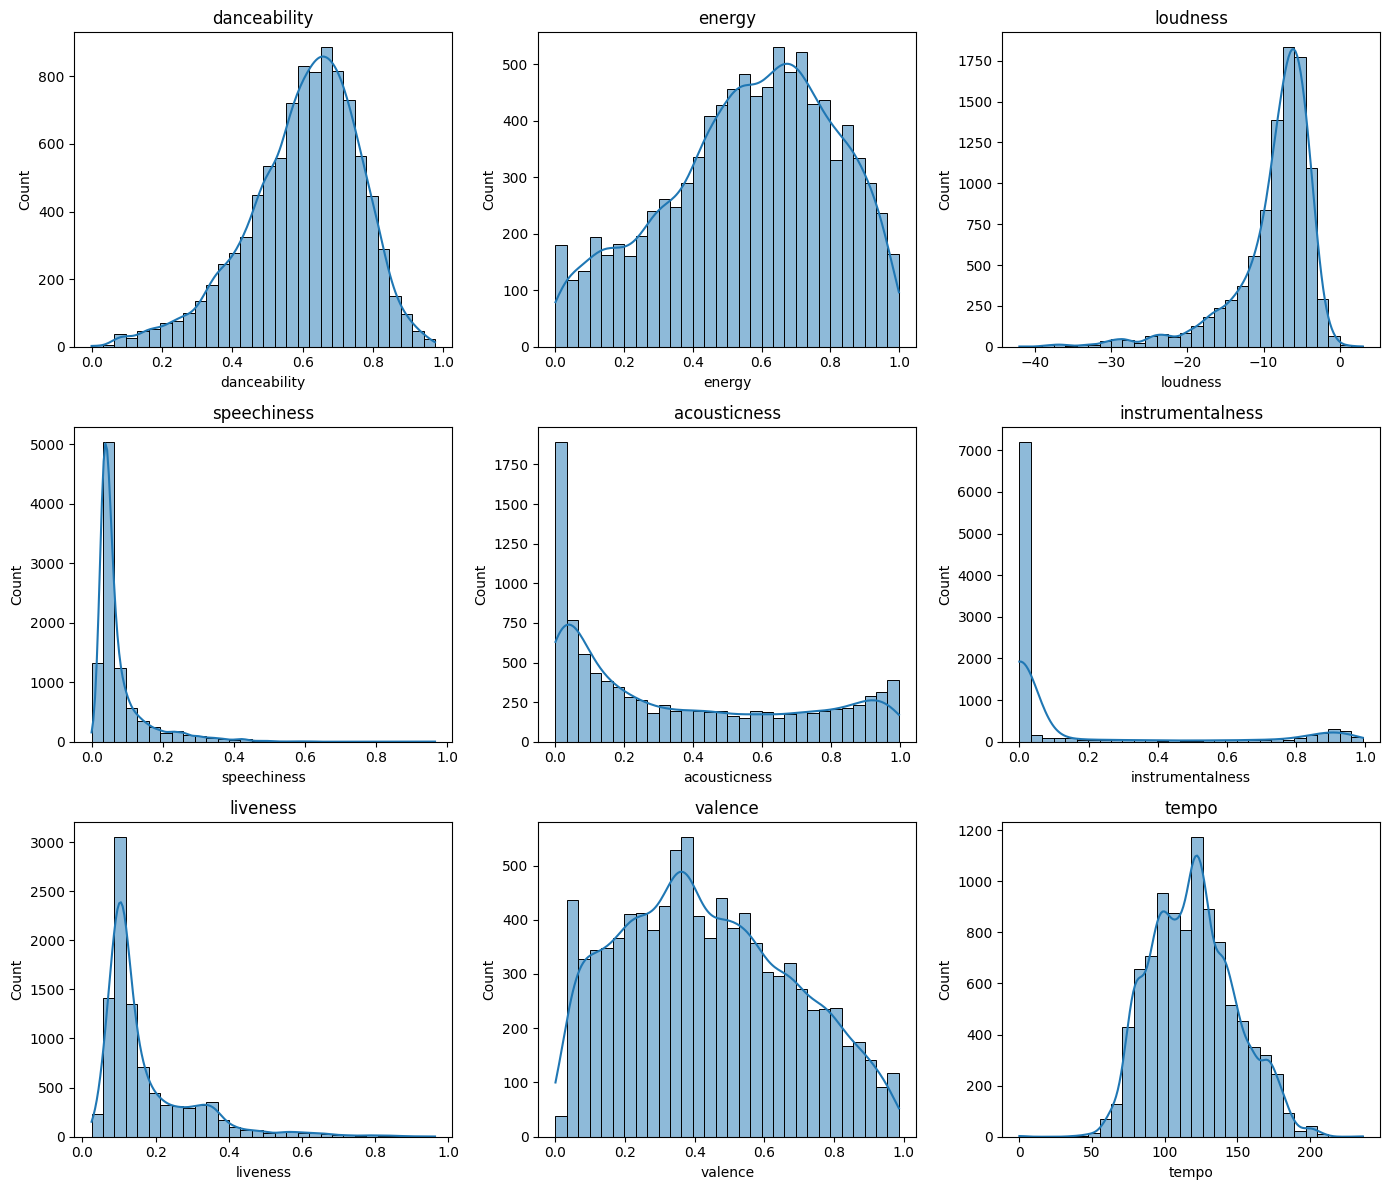

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 12))

for i, column in enumerate(df_audio_clean.columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df_audio_clean[column], kde=True, bins=30)
    plt.title(column)

plt.tight_layout()
plt.show()

### 3.3 Interpretation of Feature Distributions

The distribution plots reveal substantial differences in variability across the selected audio attributes. Several features such as **danceability, energy, valence, and tempo** exhibit approximately unimodal or moderately dispersed distributions. These attributes reflect broad stylistic diversity across contemporary music, where energetic and rhythmically driven compositions coexist with slower or less intense tracks.

In contrast, attributes such as **speechiness, acousticness, instrumentalness, and liveness** display strong positive skewness, with a large proportion of observations clustered near zero. This indicates that most tracks in the dataset contain limited spoken vocal content, are not highly acoustic, are not purely instrumental, and are not live recordings. Only a minority of tracks exhibit high values for these properties. This pattern reflects real world production practices in commercial music, where fully instrumental, acoustic, or live tracks represent a relatively niche subset.

The strong variability and mixed distribution shapes affirm that feature scaling will be required prior to model training. In particular, the skewness observed in several attributes suggests that algorithms sensitive to distance metrics, such as K-Means, would be disproportionately influenced by features with narrow value ranges unless normalization is applied. These observations provide empirical justification for scaling in subsequent preprocessing steps.


### 3.4 Correlation Analysis

To evaluate whether acoustic characteristics are interdependent, a correlation heatmap is constructed using Pearson correlation coefficients. Identifying strong correlations is crucial because correlated features can influence clustering results by amplifying redundant information. Additionally, correlation analysis guides dimensionality reduction in the PCA stage, where highly collinear attributes may contribute to shared principal components.

The heatmap allows examination of expected relationships such as the potential association between **energy and loudness**, both of which quantify aspects of track intensity. It also confirms whether conceptually distinct attributes, such as **instrumentalness and speechiness**, behave independently in the dataset.


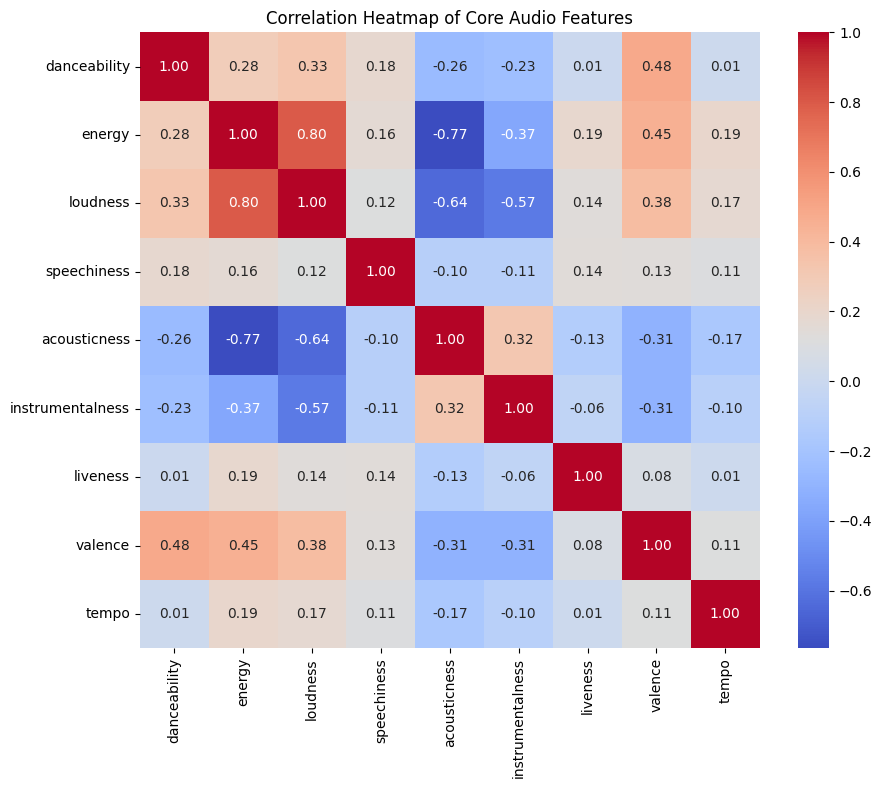

In [7]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_audio_clean.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Core Audio Features")
plt.show()

### 3.5 Interpretation of Feature Correlations

The correlation heatmap indicates a number of meaningful relationships that reflect structural properties of modern music production. The strongest observed correlation is between **energy and loudness (r ≈ 0.80)**. This relationship is expected because louder tracks generally contain denser instrumentation, amplified vocals, and greater dynamic intensity, all of which increase the perceived energy level. The magnitude of this relationship confirms that loudness serves as a proxy dimension of track intensity and may contribute jointly to the same latent musical component.

A second notable pattern is the negative correlation between **acousticness and energy/loudness**. Songs with high acousticness typically feature organic instrumentation, lower amplification, and less spectral complexity, which leads to both reduced energy scores and lower measured loudness. This inverse association highlights a structural trade-off between acoustic and electronically produced content.

Attributes such as **instrumentalness, liveness, and speechiness** show minimal correlation with most other features, indicating that these properties represent more independent stylistic elements. This suggests that instrumental tracks, live recordings, and spoken-word content contribute unique variance to the dataset, which may lead to separate cluster formation in the unsupervised modeling stage.

Overall, the correlation structure supports dimensionality reduction through PCA because several attributes share common underlying variance. PCA can therefore capture these shared components more efficiently rather than treating all variables as independent.


### 3.6 Feature Scaling and Hypotheses

Since K-Means clustering and PCA rely on distance-based calculations, differences in feature scale would disproportionately bias the model. For example, **loudness** is measured on a negative decibel scale with a wide numeric range, while **danceability** and **energy** are standardized between 0 and 1. Without normalization, features with larger numeric magnitudes will artificially dominate the clustering process. Standardization is therefore necessary to ensure that each attribute contributes equally to both dimensionality reduction and cluster assignment.

Based on the distribution and correlation patterns, the following hypotheses are proposed for validation in the modeling stage:

**Hypothesis 1:**  
Tracks with high energy and loudness values will form a distinct group representing electronically produced or highly amplified music, such as mainstream pop or electronic dance music.

**Hypothesis 2:**  
Songs with high acousticness and low loudness will cluster together, representing quieter, instrumentally focused music such as acoustic ballads or folk recordings.

**Hypothesis 3:**  
Tracks with high instrumentalness values will form a separate cluster independent of other acoustic features, reflecting music categories such as orchestral compositions or instrumental soundtracks.

Testing these hypotheses will require PCA-based visualization and interpretation of K-Means cluster centroids in subsequent sections.


In [9]:
from sklearn.preprocessing import StandardScaler

# Initialize scaler
scaler = StandardScaler()

# Fit and transform clean audio features
audio_scaled = scaler.fit_transform(df_audio_clean)

print("Shape of scaled data:", audio_scaled.shape)


Shape of scaled data: (9530, 9)


# 4. Principal Component Analysis (PCA)

Principal Component Analysis (PCA) is applied to reduce the dimensionality of the nine standardized acoustic features while retaining the majority of their variance. The purpose of PCA in this context is twofold:

1. **Visualization:** Reducing the feature space to two principal components enables graphical representation of the dataset, permitting exploratory detection of latent groupings.

2. **Noise Reduction:** Several features such as loudness and energy exhibit strong correlation, implying shared variance that can be captured more compactly. PCA consolidates correlated dimensions into composite components, reducing redundancy prior to clustering.

Each principal component (PC) represents a linear combination of the original standardized attributes, ordered by the amount of variance explained. The cumulative variance curve allows selection of an optimal number of components that balances representational efficiency and information retention. This step provides a quantitative foundation for evaluating how many dimensions to retain for K-Means clustering.

The following plots present the proportion of variance explained by each principal component and the cumulative variance retained as dimensions are added.


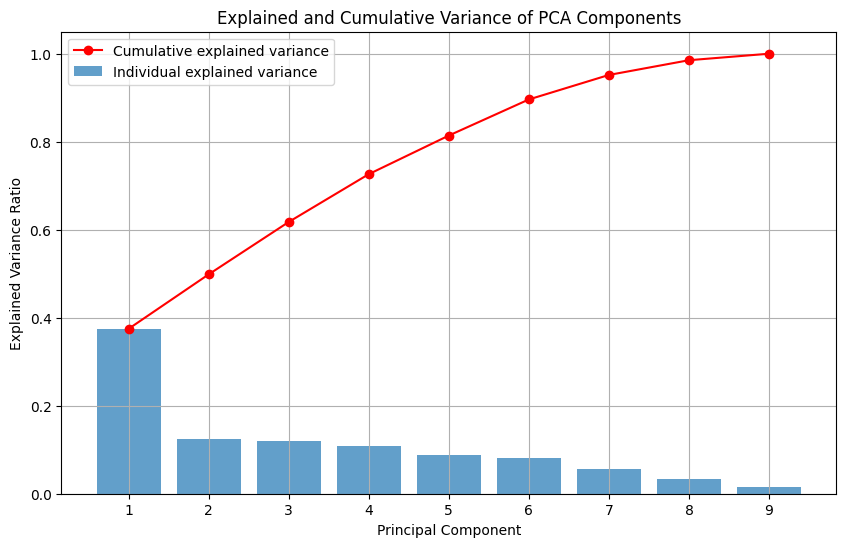

In [10]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

# Fit PCA
pca = PCA()
pca.fit(audio_scaled)

# Explained variance ratios
var_ratio = pca.explained_variance_ratio_
cumulative_var = np.cumsum(var_ratio)

# Plot explained and cumulative variance
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(var_ratio) + 1), var_ratio, alpha=0.7, label='Individual explained variance')
plt.plot(range(1, len(var_ratio) + 1), cumulative_var, marker='o', color='red', label='Cumulative explained variance')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained and Cumulative Variance of PCA Components')
plt.xticks(range(1, len(var_ratio) + 1))
plt.legend()
plt.grid(True)
plt.show()

### 4.1 Interpretation of PCA Explained Variance

The variance plot demonstrates that the **first principal component (PC1)** captures the largest share of total variance in the dataset, followed by progressively smaller contributions from subsequent components. The steep decline between PC1 and PC2 indicates that much of the meaningful structure among acoustic features is concentrated in a small number of dimensions. This pattern reflects the correlation structure identified earlier, particularly the shared variance between **energy and loudness**, along with their inverse relationship with **acousticness**.

The cumulative variance curve shows that approximately **70% of the total variance is captured by the first three principal components**, and **over 80% is captured by the first four**. In a high-dimensional unsupervised learning context, retaining components that explain 70–85% of variance is generally sufficient to preserve the underlying structure of the data while removing noise and redundancy. Retaining more components would provide diminishing returns, as additional dimensions contribute comparatively little independent variability.

To balance information retention and interpretability, the analysis will proceed using the **first three principal components** for K-Means clustering. For visualization, a two-dimensional projection using the **first two components** will be employed, allowing graphical inspection of potential cluster separation.


In [11]:
# Select number of components
pca = PCA(n_components=3)
audio_pca = pca.fit_transform(audio_scaled)

# Create a DataFrame with principal components
df_pca = pd.DataFrame(audio_pca, columns=['PC1', 'PC2', 'PC3'])
df_pca.head()

/Users/manivlamichhane/Library/Python/3.9/lib/python/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: divide by zero encountered in matmul
  X_transformed = X @ self.components_.T
/Users/manivlamichhane/Library/Python/3.9/lib/python/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: overflow encountered in matmul
  X_transformed = X @ self.components_.T
/Users/manivlamichhane/Library/Python/3.9/lib/python/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: invalid value encountered in matmul
  X_transformed = X @ self.components_.T


,PC1,PC2,PC3
0,1.896476,-1.257693,1.369818
1,-4.025728,0.075345,0.348671
2,2.096108,-0.654564,0.890716
3,0.331208,1.046796,-0.496893
4,0.694589,0.061729,-0.957183


### 4.2 PCA Visualization of the Audio Feature Space

To explore whether natural separations exist among songs based solely on their acoustic properties, the first two principal components (PC1 and PC2) are visualized in a two-dimensional scatter plot. Although no class labels are available, visual inspection enables the identification of dense regions or loosely separated clouds that may correspond to latent categories of music.

Because PCA combines correlated variables into composite axes, PC1 and PC2 represent dominant stylistic contrasts reflected in the feature space. For example, a component heavily influenced by energy and loudness would distinguish highly amplified tracks from quieter acoustic compositions. Visual patterns in this reduced space will inform whether strong clustering tendencies are present, thereby motivating the subsequent application of K-Means.

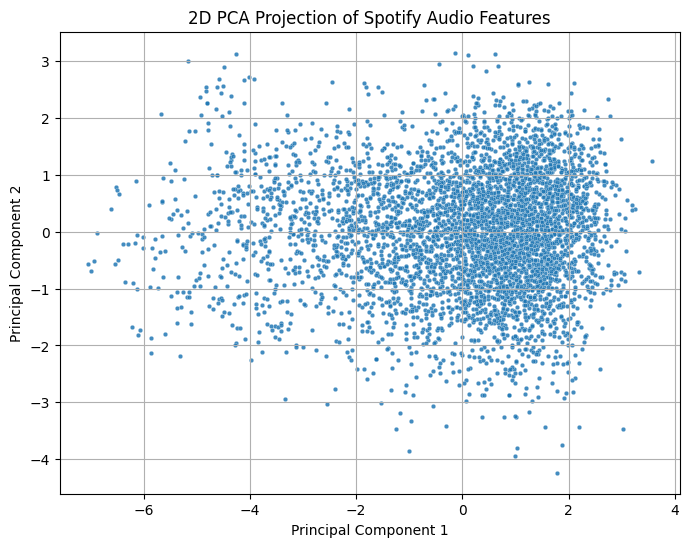

In [12]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_pca['PC1'], y=df_pca['PC2'], s=10, alpha=0.6)
plt.title("2D PCA Projection of Spotify Audio Features")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()


# 5. K-Means Clustering

K-Means clustering is applied to the reduced feature space obtained from PCA. Because PCA captures the dominant sources of acoustic variation in fewer dimensions, clustering on principal components enables grouping based on the most informative structure while reducing noise and redundancy.

The K-Means algorithm partitions data into \( k \) clusters by minimizing within-cluster sum of squared distances (WCSS). However, selection of \( k \) cannot be arbitrary, as too few clusters would merge musically distinct styles, while too many clusters would fragment meaningful categories into artificial subgroups. Therefore, the optimal number of clusters must be determined empirically using model selection criteria.

Two metrics are employed:

1. **Elbow Method**, which analyzes the rate of decrease in WCSS to identify diminishing returns in cluster separation.

2. **Silhouette Score**, which measures how well each data point matches its assigned cluster relative to surrounding clusters. Values close to 1 indicate distinct separation, while values near 0 or negative indicate poor separation.

Using both metrics provides robustness by combining geometric compactness with separability.


/Users/manivlamichhane/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/manivlamichhane/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/manivlamichhane/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/manivlamichhane/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: divide by zero encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/manivlamichhane/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: overflow encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/manivlamichhane/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: invali

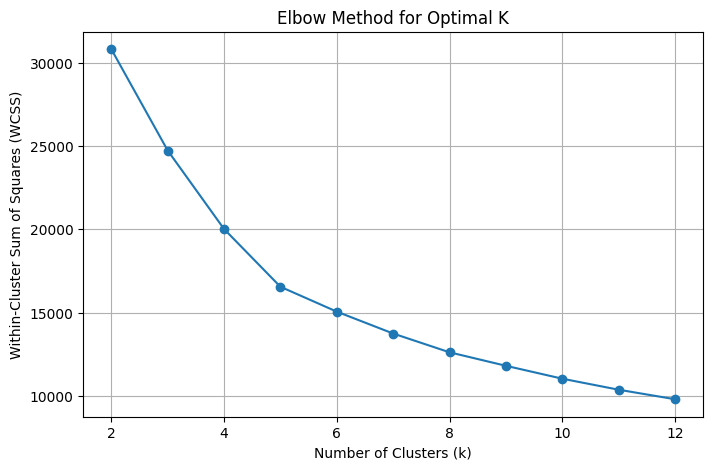

In [13]:
from sklearn.cluster import KMeans
wcss = []

# Try K values from 2 to 12
for k in range(2, 13):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_pca[['PC1', 'PC2', 'PC3']])
    wcss.append(kmeans.inertia_)

# Plot WCSS vs K
plt.figure(figsize=(8, 5))
plt.plot(range(2, 13), wcss, marker='o')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Within-Cluster Sum of Squares (WCSS)")
plt.grid(True)
plt.show()

/Users/manivlamichhane/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/manivlamichhane/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/manivlamichhane/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/manivlamichhane/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: divide by zero encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/manivlamichhane/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: overflow encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/manivlamichhane/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: invali

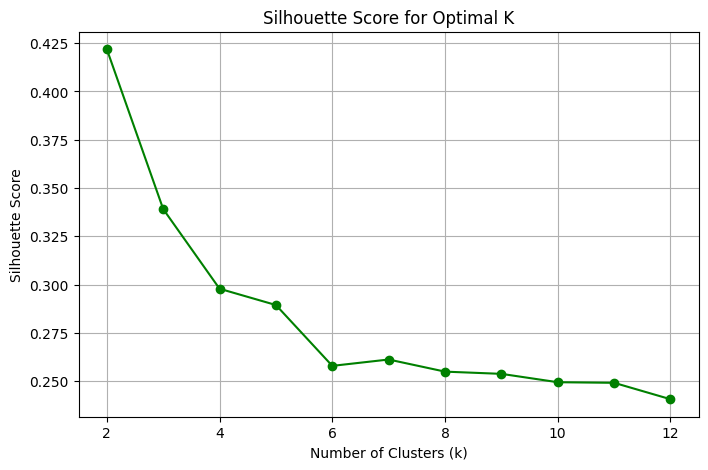

In [14]:
from sklearn.metrics import silhouette_score

sil_scores = []

for k in range(2, 13):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(df_pca[['PC1', 'PC2', 'PC3']])
    sil_scores.append(silhouette_score(df_pca[['PC1', 'PC2', 'PC3']], labels))

# Plot silhouette scores
plt.figure(figsize=(8, 5))
plt.plot(range(2, 13), sil_scores, marker='o', color='green')
plt.title("Silhouette Score for Optimal K")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

### 5.1 Selection of Optimal Number of Clusters

Model selection was performed using both the Elbow Curve and the Silhouette Score. The Elbow Curve shows a steep decline in within-cluster variance up to \( k = 3 \), after which the rate of improvement decreases noticeably, indicating diminishing returns. This suggests that increasing beyond three clusters yields proportionally less structural separation.

The Silhouette Curve displays its maximum value at \( k = 2 \), but declines sharply afterward. While a two-cluster solution would maximize separation, it would provide only a binary partition of musical styles, oversimplifying the rich diversity present in acoustic recordings. From an interpretability perspective, two clusters would not adequately reflect distinct categories such as highly energetic tracks, acoustic music, or instrumental compositions, each of which was hypothesized earlier as meaningful subgroups.

A balance between statistical fit and interpretability is therefore required. The value **\( k = 3 \)** offers the best compromise: it appears at the Elbow inflection point and maintains a relatively high Silhouette Score while enabling the identification of musically distinct categories. Consequently, the clustering model will proceed with **three clusters**, aligning both with empirical evidence and with the hypothesized structure of the dataset.


In [15]:
# Fit K-Means with k = 3
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df_pca['Cluster'] = kmeans.fit_predict(df_pca[['PC1', 'PC2', 'PC3']])

df_pca.head()

/Users/manivlamichhane/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/manivlamichhane/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/manivlamichhane/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/manivlamichhane/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: divide by zero encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/manivlamichhane/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: overflow encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/manivlamichhane/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: invali

,PC1,PC2,PC3,Cluster
0,1.896476,-1.257693,1.369818,0
1,-4.025728,0.075345,0.348671,2
2,2.096108,-0.654564,0.890716,0
3,0.331208,1.046796,-0.496893,1
4,0.694589,0.061729,-0.957183,1


### 5.2 Visualization of K-Means Clusters in PCA Space

To examine how well the K-Means model separates songs based on acoustic features, the resulting cluster assignments are visualized in the two-dimensional PCA projection. Although PCA reduces nine original features into composite axes, distinct groupings within this projection reflect meaningful acoustic differences consolidated during dimensionality reduction.

Cluster boundaries are not expected to form rigid separations in 2D space due to variance captured by higher components; nonetheless, distinct dense regions provide evidence of meaningful groupings. Visual inspection enables comparison with the earlier hypotheses concerning high-energy, acoustic, and instrumental tracks.

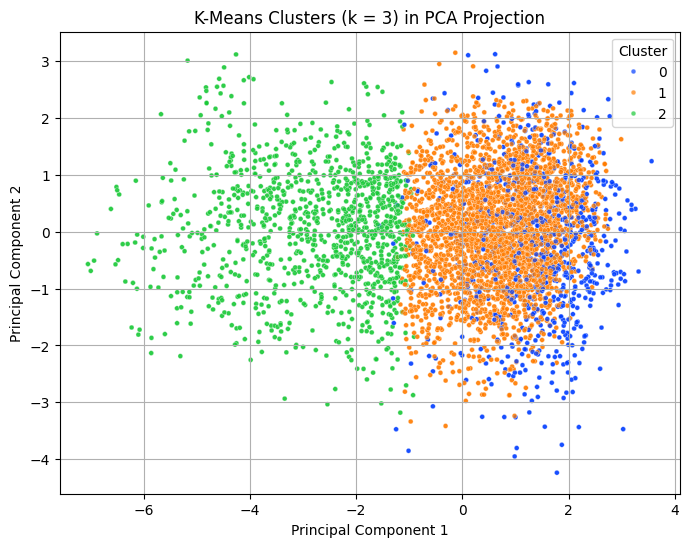

In [17]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=df_pca['PC1'], 
    y=df_pca['PC2'], 
    hue=df_pca['Cluster'],
    palette='bright',
    s=12, alpha=0.7
)
plt.title("K-Means Clusters (k = 3) in PCA Projection")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()

In [18]:
# Add cluster labels back to original (scaled) data
df_clusters = df_audio_clean.copy()
df_clusters['Cluster'] = df_pca['Cluster'].values

# Compute cluster centroids (mean of each feature)
centroids = df_clusters.groupby('Cluster').mean()
centroids

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
Cluster,,,,,,,,,
0,0.642631,0.712962,-6.276793,0.192506,0.217842,0.078078,0.340700,0.529161,130.590641
1,0.637116,0.647668,-6.660119,0.059490,0.239821,0.060196,0.145399,0.489190,120.246968
2,0.481965,0.234860,-15.770204,0.050082,0.792728,0.454053,0.137378,0.220901,109.259256


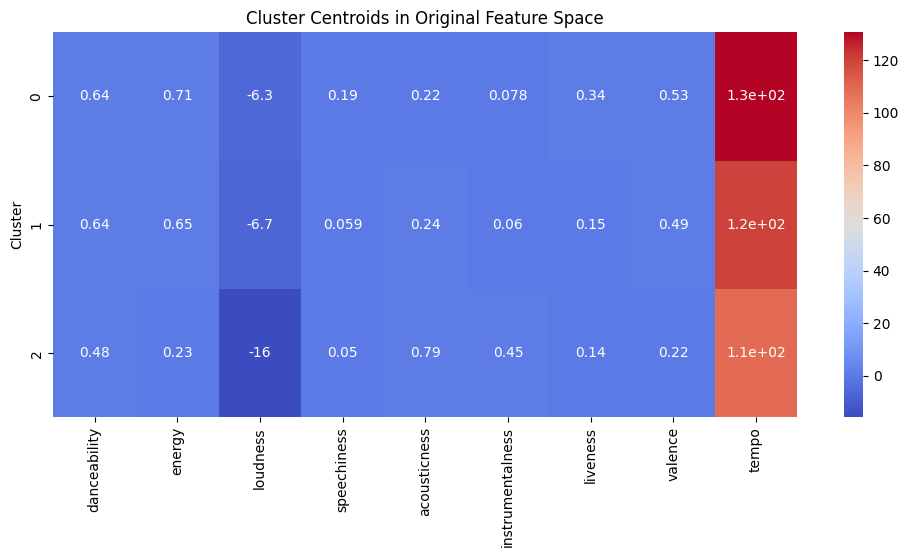

In [19]:
plt.figure(figsize=(12, 5))
sns.heatmap(centroids, annot=True, cmap='coolwarm')
plt.title("Cluster Centroids in Original Feature Space")
plt.show()

### 5.3 Interpretation of Clusters

The centroids computed in the original feature space reveal three distinct acoustic profiles that align with different styles of music production.

**Cluster 0: High-Energy, Rhythm-Dominant Music**

This cluster exhibits elevated values of **energy (0.71), danceability (0.64), and liveness (0.34)**, combined with relatively high **valence (0.53)**. Its loudness is moderately high (–6.28 dB), and the tempo is the highest among clusters (≈131 BPM). These characteristics suggest tracks that are upbeat, amplified, and intended for active listening contexts (e.g., mainstream pop, dance-oriented pop, energetic rock-pop hybrids).

**Cluster 1: Balanced, Moderate-Intensity Tracks**

Cluster 1 reflects a more neutral musical profile, with moderate **danceability (0.64)** and **energy (0.65)**, along with neither strongly acoustic nor strongly instrumental composition. Its tempo (≈120 BPM) and loudness (≈–6.67 dB) are close to typical commercial music averages. This cluster likely represents broadly appealing tracks that combine both acoustic and electronic elements without extreme stylistic characteristics. These songs may include standard pop and light alternative music without pronounced intensity or acoustic identity.

**Cluster 2: Acoustic and Instrumental Music**

Cluster 2 shows the lowest loudness (–15.77 dB), very low energy (0.23), and the highest **acousticness (0.79)** and **instrumentalness (0.45)**. The low valence (0.22) also indicates less emotional brightness relative to other clusters, and the tempo is slower (≈109 BPM). These properties align with quieter, dynamically restrained compositions such as acoustic ballads, orchestral pieces, ambient music, and other instrumental tracks.


### 5.4 Evaluation of Hypotheses

The clustering results support the three hypotheses proposed during the exploratory data analysis stage:

1. **High-energy and loud tracks form a distinct cluster.**  
   Cluster 0 exhibits the highest energy, elevated loudness, and the brightest affect (valence). This confirms that amplified and rhythmically demanding music forms a unique acoustic grouping.

2. **High-acousticness songs cluster separately with lower loudness.**  
   Cluster 2 contains the highest acousticness and lowest loudness, directly validating the hypothesis that acoustic tracks form a discrete subset characterized by softer dynamics and reduced amplification.

3. **Instrumental tracks occupy an independent acoustic space.**  
   Instrumentalness is highest in Cluster 2, and its features diverge sharply from those in Clusters 0 and 1. This confirms that instrumental music represents a distinct structural category within the data, rather than a smooth variation within mainstream music clusters.

These findings demonstrate that Spotify’s machine-generated acoustic descriptors are sufficiently expressive to uncover latent stylistic categories without human-provided labels. The validation of all three hypotheses shows that unsupervised learning accurately reflects real-world variations in musical production and style.


## 6. Conclusion

This study applied unsupervised learning to audio feature data extracted from Spotify’s proprietary analysis models. After examining numerical distributions, correlations, and dimensionality, Principal Component Analysis (PCA) was used to reduce the feature space while retaining major sources of variance. K-Means clustering was subsequently performed on the reduced feature representation and evaluated using both the Elbow Method and Silhouette Score.

The resulting clusters revealed three coherent and interpretable categories of music grounded in measurable acoustic properties:

1. **Energetic and amplified tracks**, characterized by high loudness, rhythmic drive, and elevated affective brightness.
2. **Moderate-intensity, stylistically balanced music**, reflecting mainstream compositional norms without pronounced acoustic or electronic specialization.
3. **Acoustic or instrumental recordings**, exhibiting minimal amplification, slower tempos, and greater timbral purity.

The findings confirm that unsupervised learning can categorize musical recordings based solely on machine-derived audio attributes, without access to genre metadata or labeled training examples. These results suggest practical applications in automated playlist generation, recommendation systems, and music library organization.

Future work may extend this analysis by incorporating additional latent feature representations such as mel-frequency cepstral coefficients (MFCCs), experimenting with alternative clustering techniques (e.g., DBSCAN, Gaussian Mixture Models), or integrating temporal dynamics derived from audio waveform analysis to further enhance modeling fidelity.